In [28]:
from sklearn.cluster import (KMeans,AgglomerativeClustering,DBSCAN,MeanShift,HDBSCAN,BisectingKMeans,
                             MiniBatchKMeans,SpectralClustering,SpectralCoclustering)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

In [2]:
#this is for ignore all warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset 
data=pd.read_csv('data.csv')
data

,X,Y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682
...,...,...
331,638.916471,323.569096
332,542.005901,347.527070
333,611.964612,377.254978
334,520.654168,455.996453


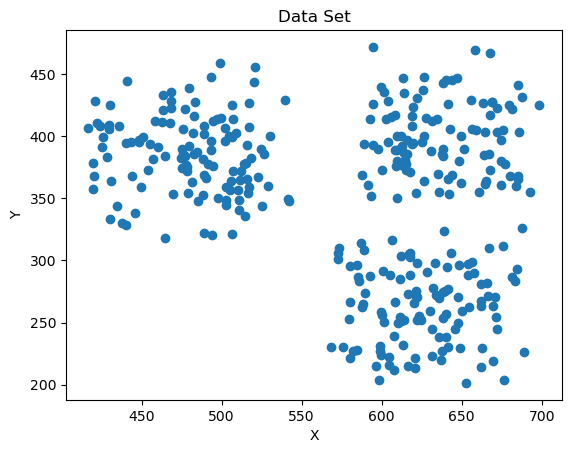

In [17]:
#plot dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### K_means Clustering
the main aims to of this algorithm is to group similar data points together and discover underlying patterns. The algorithm iteratively assigns each data point to the nearest centroid and updates the centroids based on the mean of the assigned points, This process continues until convergence, where centroids no longer change significantly, we can use different equations to calculate the distance between centroids and the data points. K-means requires a specific number of clusters (K) , we can use the elbow methode to find the optimal number of cluster.

In [18]:
#ues the elbow methode to find the optimal number of cluster
n_cluster=range(1,10)
sse=[]
for k in n_cluster:
    model=KMeans(n_clusters=k)
    model.fit(data)
    sse.append(model.inertia_)


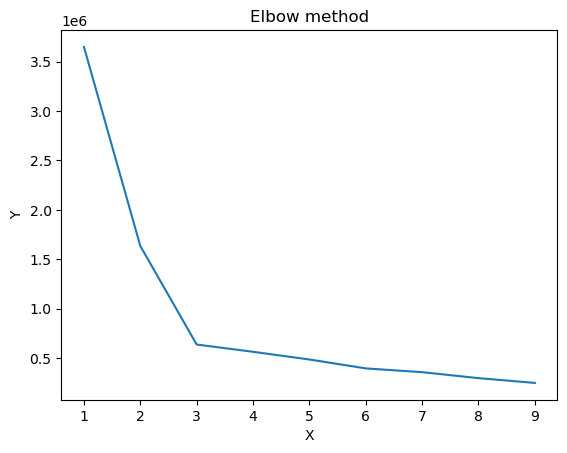

In [19]:
plt.plot(n_cluster,sse)
plt.title('Elbow method')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [20]:
n_clusters = range(2,10)

for k in n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k,init='k-means++')
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data,cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        round(silhouette_avg,4),
    )


For n_clusters = 2 The average silhouette_score is : 0.519
For n_clusters = 3 The average silhouette_score is : 0.6111
For n_clusters = 4 The average silhouette_score is : 0.4759
For n_clusters = 5 The average silhouette_score is : 0.3882
For n_clusters = 6 The average silhouette_score is : 0.4319
For n_clusters = 7 The average silhouette_score is : 0.3486
For n_clusters = 8 The average silhouette_score is : 0.3442
For n_clusters = 9 The average silhouette_score is : 0.3834


##### K-means++

In [21]:
model=KMeans(n_clusters=3,init='k-means++')
predict=model.fit_predict(data)


In [22]:
data['cluster']=predict
data

,X,Y,cluster
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0
...,...,...,...
331,638.916471,323.569096,1
332,542.005901,347.527070,0
333,611.964612,377.254978,2
334,520.654168,455.996453,0


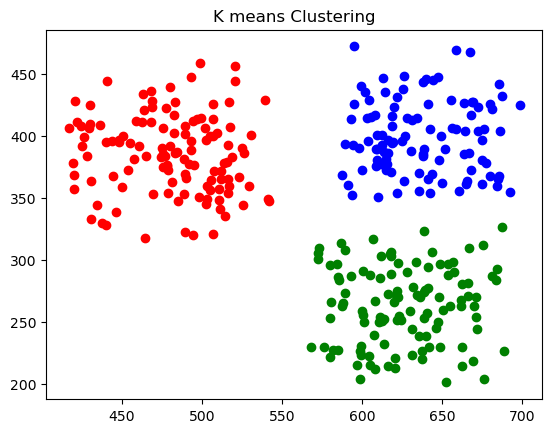

In [23]:
cluster1=data[data['cluster']==0]
cluster2=data[data['cluster']==1]
cluster3=data[data['cluster']==2]
plt.scatter(cluster1.X,cluster1.Y,color='red')
plt.scatter(cluster2.X,cluster2.Y,color='green')
plt.scatter(cluster3.X,cluster3.Y,color='blue')
plt.title('K means Clustering')
plt.show()

##### Bisecting K-means

In [24]:
data=pd.read_csv('data.csv')

In [25]:
# initialize and fit the Bisecting KMeans model
bisect_means = BisectingKMeans(n_clusters=3, random_state=0)
labels=bisect_means.fit(data)


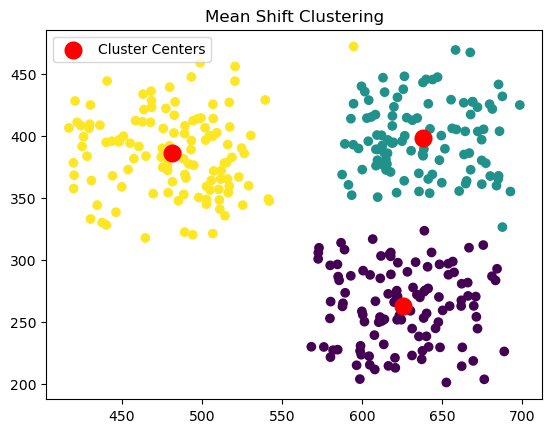

In [26]:
plt.scatter(data['X'], data['Y'], c=bisect_means.labels_)
plt.title('Mean Shift Clustering')
plt.scatter(bisect_means.cluster_centers_[:, 0], bisect_means.cluster_centers_[:, 1], 
            c='red', marker='o', s=100, linewidths=3, label='Cluster Centers')
plt.legend()
plt.show()

##### Mini Batch K-means

In [27]:
# initialize the batch size
batch_size = 45
 
# fit the mini batch K-means
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3,
                      batch_size = batch_size, n_init = 10,
                      max_no_improvement = 10)
 
mbk.fit(data)

MiniBatchKMeans(batch_size=45, n_clusters=3, n_init=10)

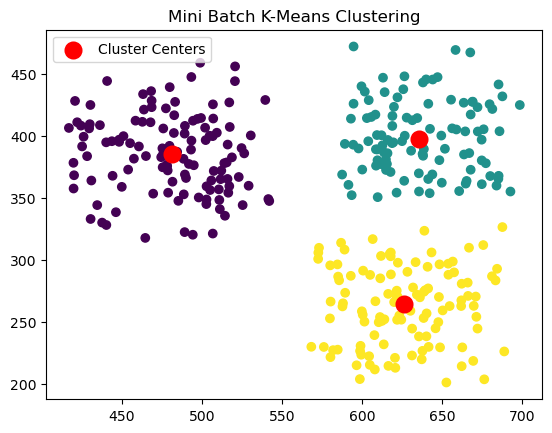

In [28]:
plt.scatter(data['X'], data['Y'], c=mbk.labels_)
plt.title('Mini Batch K-Means Clustering')
plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], 
            c='red', marker='o', s=100, linewidths=3, label='Cluster Centers')
plt.legend()
plt.show()

##### Hierarchical Clustering

In [29]:
data=pd.read_csv('data.csv')

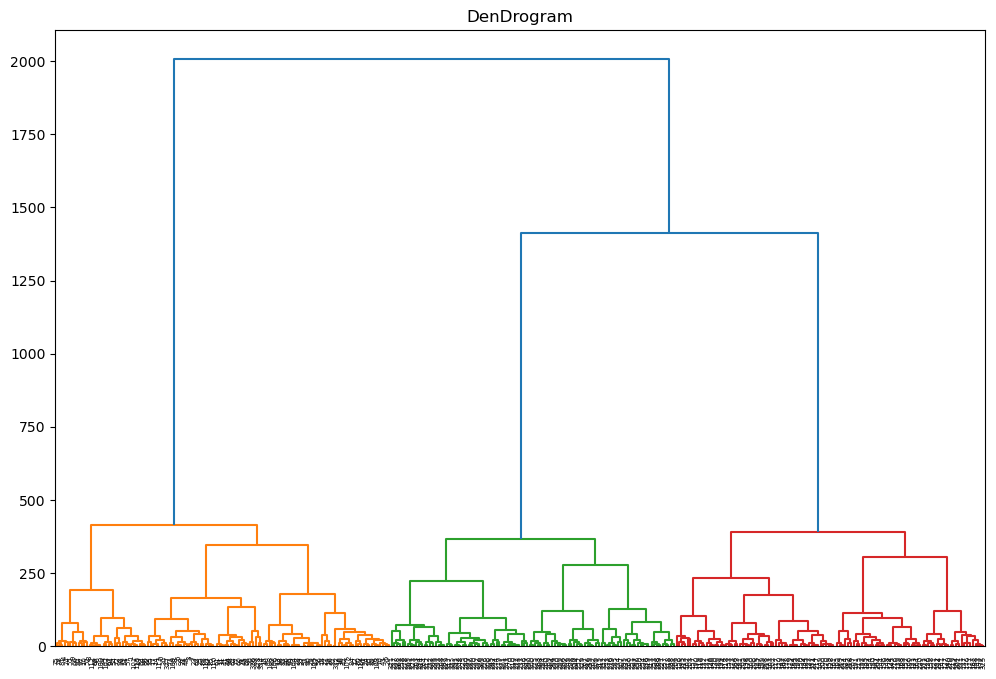

In [30]:
# plot dendrogram to find optimal number of clusters
plt.figure(figsize=(12,8))
plt.title('DenDrogram')
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

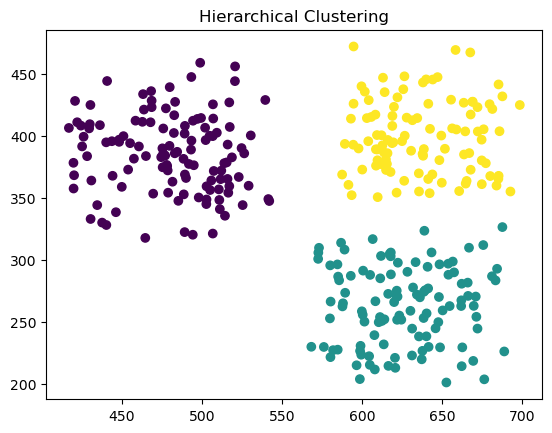

In [31]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data['X'], data['Y'], c=labels)
plt.title('Hierarchical Clustering')
plt.show()

##### DBScan clustering

In [32]:
# initialize and fit the DBSCAN model
dbscan=DBSCAN(eps=20,min_samples=3)
model=dbscan.fit(data)


In [33]:
labels=model.labels_

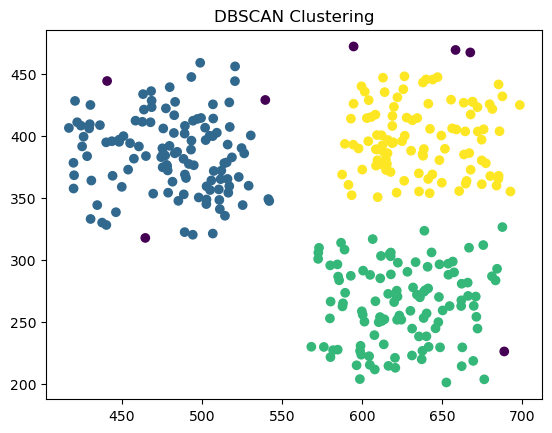

In [34]:
plt.scatter(data['X'], data['Y'], c=labels)
plt.title('DBSCAN Clustering')
plt.show()

##### Mean Shift Clustering

In [35]:
# initialize and fit the MeanShift model
mean_shift = MeanShift(bin_seeding=True)  
model = mean_shift.fit(data)


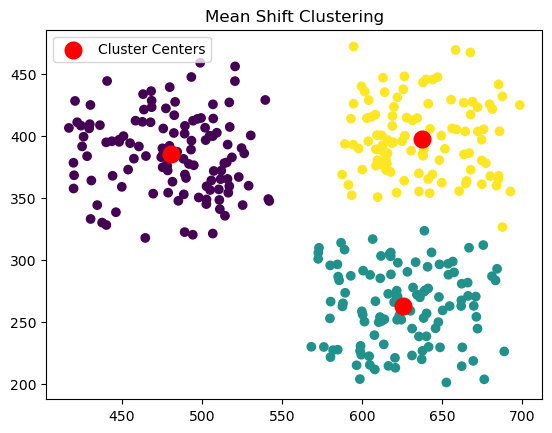

In [36]:
plt.scatter(data['X'], data['Y'], c=mean_shift.labels_)
plt.title('Mean Shift Clustering')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
            c='red', marker='o', s=100, linewidths=3, label='Cluster Centers')
plt.legend()
plt.show()


##### HDBSCAN

In [37]:
# initialize and fit the HDBSCAN model
hdb = HDBSCAN()
hdb.fit(data)

HDBSCAN()

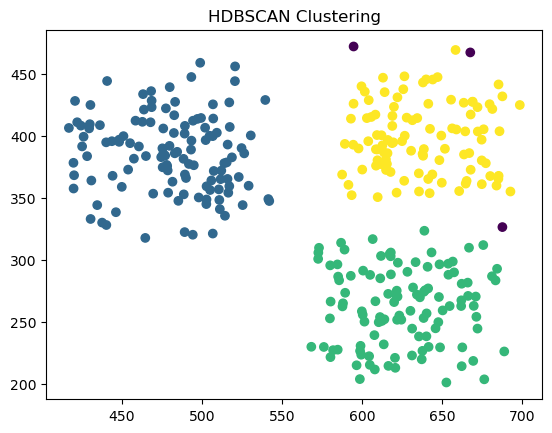

In [38]:
# plot the results
plt.scatter(data['X'], data['Y'], c=hdb.labels_)
plt.title('HDBSCAN Clustering')
plt.show()

##### Spectral Clustering

In [25]:
# initialize and fit the spectral clustering model
spectral = SpectralClustering(n_clusters=3,affinity ='nearest_neighbors',random_state=0)
labels=spectral.fit_predict(data)

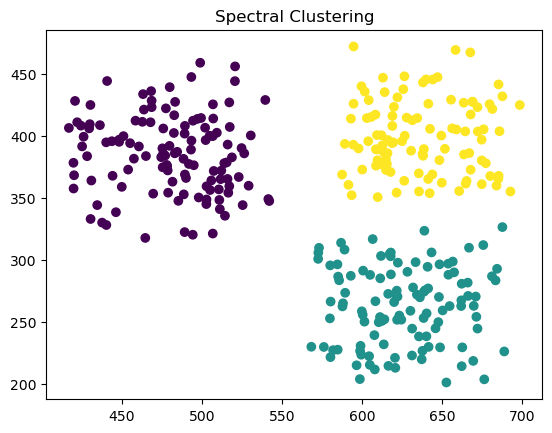

In [26]:
plt.title('Spectral Clustering')
plt.scatter(data['X'], data['Y'], c=spectral.labels_)
plt.show()

##### Spectral Co-Clustering

In [47]:
spectral_Coclustering = SpectralCoclustering(n_clusters=3,mini_batch=True,n_init=1)
spectral_Coclustering.fit(data)

SpectralCoclustering(mini_batch=True, n_init=1)

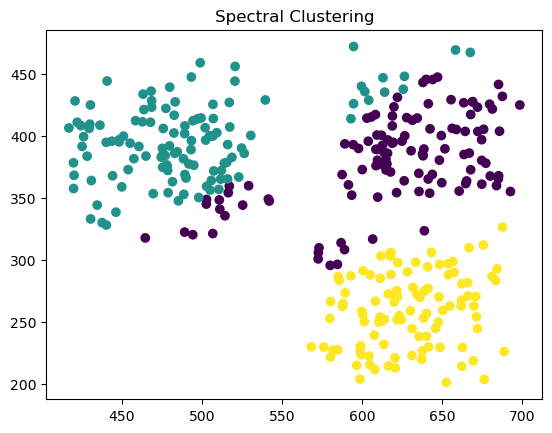

In [48]:
plt.title('Spectral Clustering')
plt.scatter(data['X'], data['Y'], c=spectral_Coclustering.row_labels_)
plt.show()